The aim of this project is to predict if this loan credit would be a risk to the bank or not!
In simple words, if the loan amount is given to the applicant, will they pay back or become a defaulter.
* Target Variable: GoodCredit

In [94]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [95]:
import pandas as pd
import numpy as np

CreditRiskData= pd.read_csv(filepath_or_buffer="C:/Users/nandi/OneDrive/Documents/IVY/Python/IVY Python ML Mar-2023/Python Datasets/Classification Datasets/CreditRiskData.csv", sep=",", encoding="latin")

In [96]:
CreditRiskData.head(10)

,GoodCredit,checkingstatus1,duration2,history3,purpose4,amount5,savings6,employ7,installment8,status9,...,residence11,property12,age13,otherplans14,housing15,cards16,job17,liable18,tele19,foreign20
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201
5,0,A14,36,A32,A46,9055,A65,A73,2,A93,...,4,A124,35,A143,A153,1,A172,2,A192,A201
6,0,A14,24,A32,A42,2835,A63,A75,3,A93,...,4,A122,53,A143,A152,1,A173,1,A191,A201
7,0,A12,36,A32,A41,6948,A61,A73,2,A93,...,2,A123,35,A143,A151,1,A174,1,A192,A201
8,0,A14,12,A32,A43,3059,A64,A74,2,A91,...,4,A121,61,A143,A152,1,A172,1,A191,A201
9,1,A12,30,A34,A40,5234,A61,A71,4,A94,...,2,A123,28,A143,A152,2,A174,1,A191,A201


In [97]:
print(CreditRiskData.columns)

Index(['GoodCredit', 'checkingstatus1', 'duration2', 'history3', 'purpose4',
       'amount5', 'savings6', 'employ7', 'installment8', 'status9', 'others10',
       'residence11', 'property12', 'age13', 'otherplans14', 'housing15',
       'cards16', 'job17', 'liable18', 'tele19', 'foreign20'],
      dtype='object')


In [98]:
# Removing duplicates if present
print("The shape of data before removing the duplicates", CreditRiskData.shape)

CreditRiskData.drop_duplicates()
print("The shape of data after removing the duplicates", CreditRiskData.shape)

CreditRiskData.head(10)

The shape of data before removing the duplicates (1000, 21)
The shape of data after removing the duplicates (1000, 21)


,GoodCredit,checkingstatus1,duration2,history3,purpose4,amount5,savings6,employ7,installment8,status9,...,residence11,property12,age13,otherplans14,housing15,cards16,job17,liable18,tele19,foreign20
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201
5,0,A14,36,A32,A46,9055,A65,A73,2,A93,...,4,A124,35,A143,A153,1,A172,2,A192,A201
6,0,A14,24,A32,A42,2835,A63,A75,3,A93,...,4,A122,53,A143,A152,1,A173,1,A191,A201
7,0,A12,36,A32,A41,6948,A61,A73,2,A93,...,2,A123,35,A143,A151,1,A174,1,A192,A201
8,0,A14,12,A32,A43,3059,A64,A74,2,A91,...,4,A121,61,A143,A152,1,A172,1,A191,A201
9,1,A12,30,A34,A40,5234,A61,A71,4,A94,...,2,A123,28,A143,A152,2,A174,1,A191,A201


# Checking the distribustion of the target variable

<Axes: xlabel='GoodCredit'>

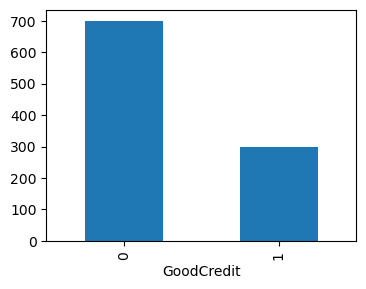

In [99]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=CreditRiskData.groupby('GoodCredit').size()
GroupedData.plot(kind='bar', figsize=(4,3))

# Basic Data Exploration

In [100]:
CreditRiskData.describe()

,GoodCredit,duration2,amount5,installment8,residence11,age13,cards16,liable18
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [101]:
CreditRiskData.nunique()

GoodCredit           2
checkingstatus1      4
duration2           33
history3             5
purpose4            10
amount5            921
savings6             5
employ7              5
installment8         4
status9              4
others10             3
residence11          4
property12           4
age13               53
otherplans14         3
housing15            3
cards16              4
job17                4
liable18             2
tele19               2
foreign20            2
dtype: int64

* GoodCredit: Selected. Categorical. This is the Target Variable!
* checkingstatus: Selected. Categorical
* duration: Selected. Continuous
* history: Selected. Categorical
* purpose: Selected. Categorical
* amount: Selected. Continuous
* savings: Selected. Categorical
* employ: Selected. Categorical
* installment: Selected. Categorical
* status: Selected. Categorical
* others: Selected. Categorical
* residence: Selected. Categorical
* property: Selected. Categorical
* age: Selected. Continuous
* otherplans: Selected. Categorical
* housing: Selected. Categorical
* cards: Selected. Categorical
* job: Selected. Categorical
* liable: Selected. Categorical
* tele: Selected. Categorical
* foreign: Selected. Categorical

In [119]:
CreditRiskData.rename(columns={"checkingstatus": "CheckingStatus",
                              "duration": "Duration",
                              "history": "History",
                              "purpose": "Purpose",
                              "amount": "Amount",
                              "savings":"Savings",
                              "employ": "Employ",
                              "installment":"Installment",
                              "status":"Status","others":"Others","residence":"Residence","property":"Property",
                              "age":"Age","otherplans":"Otherplans","housing":"Housing","cards":"Cards","job":"Job","liable":"Liable",
                              "tele":"Tele","foreign":"Foreign"}, inplace=True)
print(CreditRiskData.columns)

Index(['GoodCredit', 'checkingstatus1', 'duration2', 'history3', 'purpose4',
       'amount5', 'savings6', 'employ7', 'installment8', 'status9', 'others10',
       'residence11', 'property12', 'age13', 'otherplans14', 'housing15',
       'cards16', 'job17', 'liable18', 'tele19', 'foreign20'],
      dtype='object')


In [127]:
CreditRiskData.columns=["GoodCredit","CheckingStatus",
                              "Duration",
                               "History",
                               "Purpose",
                               "Amount",
                              "Savings",
                              "Employ",
                              "Installment",
                              "Status","Others","Residence","Property",
                              "Age","OtherPlans","Housing","Cards","Job","Liable",
                              "Tele","Foreign"]
CreditRiskData.head()

,GoodCredit,CheckingStatus,Duration,History,Purpose,Amount,Savings,Employ,Installment,Status,...,Residence,Property,Age,OtherPlans,Housing,Cards,Job,Liable,Tele,Foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


# Visual Exploratory Analysis

In [128]:
def plotbar(inpData, colls):
    
    import matplotlib.pyplot as plt
    fig, subPlot=plt.subplots(nrows=1, ncols= len(colls), figsize=(20,5))
    fig.suptitle("Bar charts of:" + str(colls))
    
    for colName, plotNumber in zip(colls, range(len(colls))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

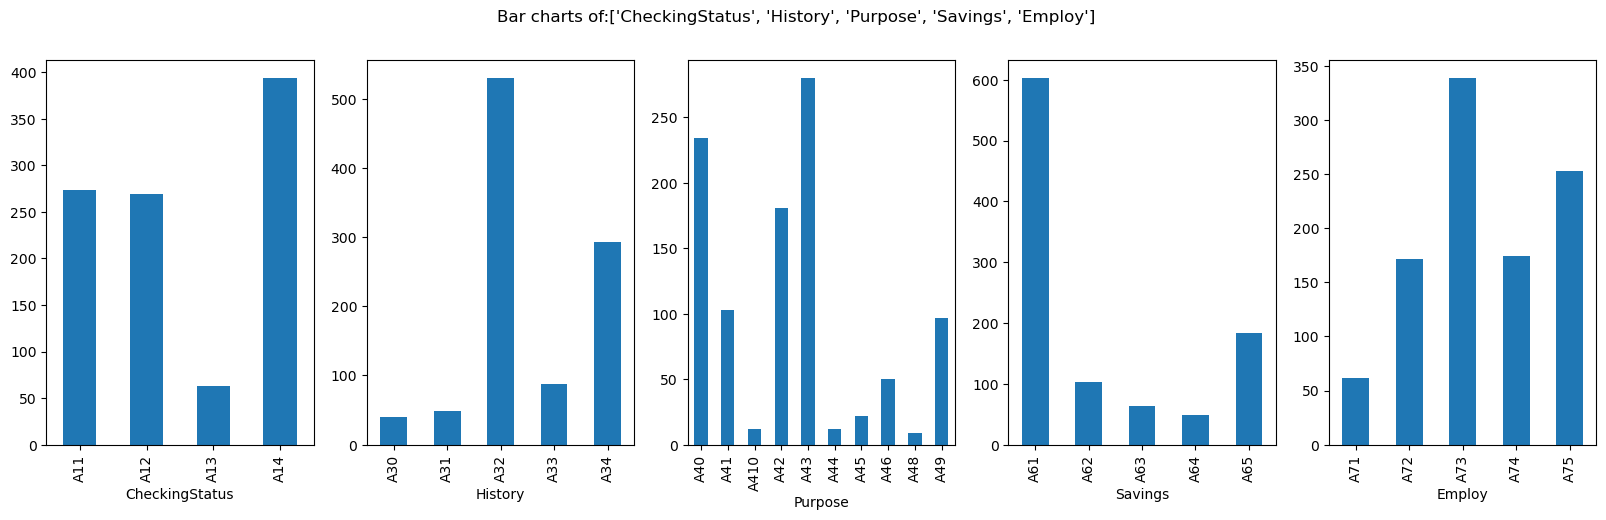

In [129]:
plotbar(inpData=CreditRiskData, colls=["CheckingStatus", "History", "Purpose","Savings","Employ"])

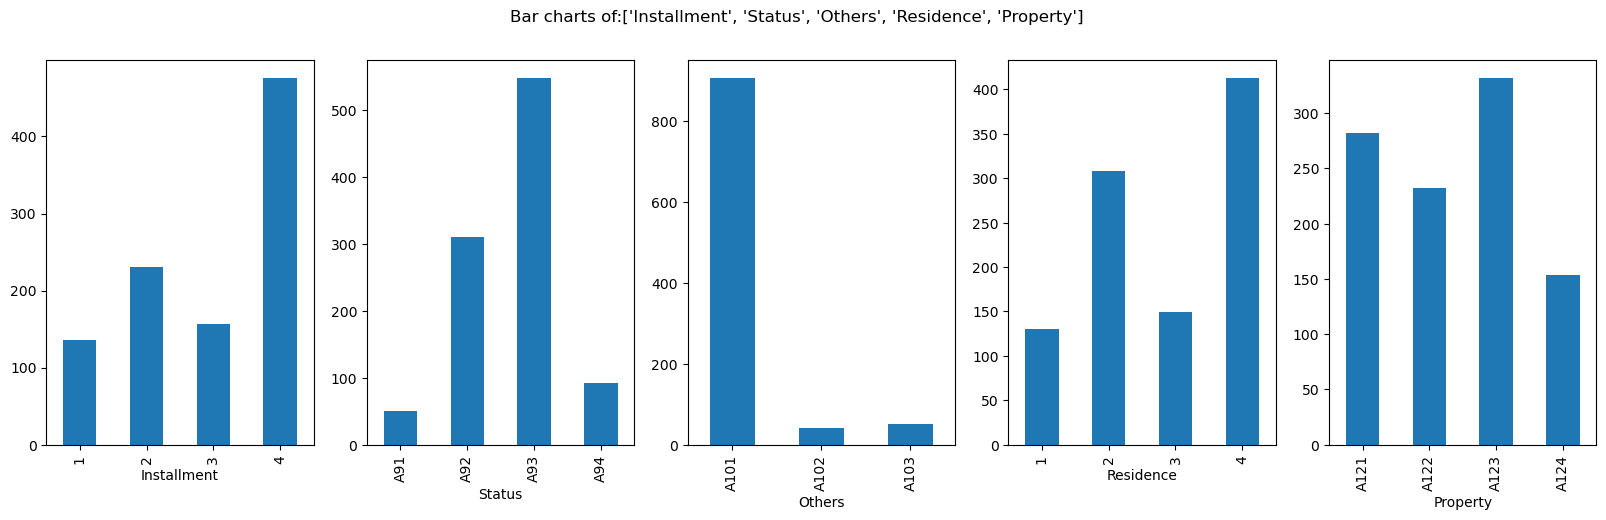

In [130]:
plotbar(inpData=CreditRiskData, colls=["Installment", "Status","Others","Residence","Property"])

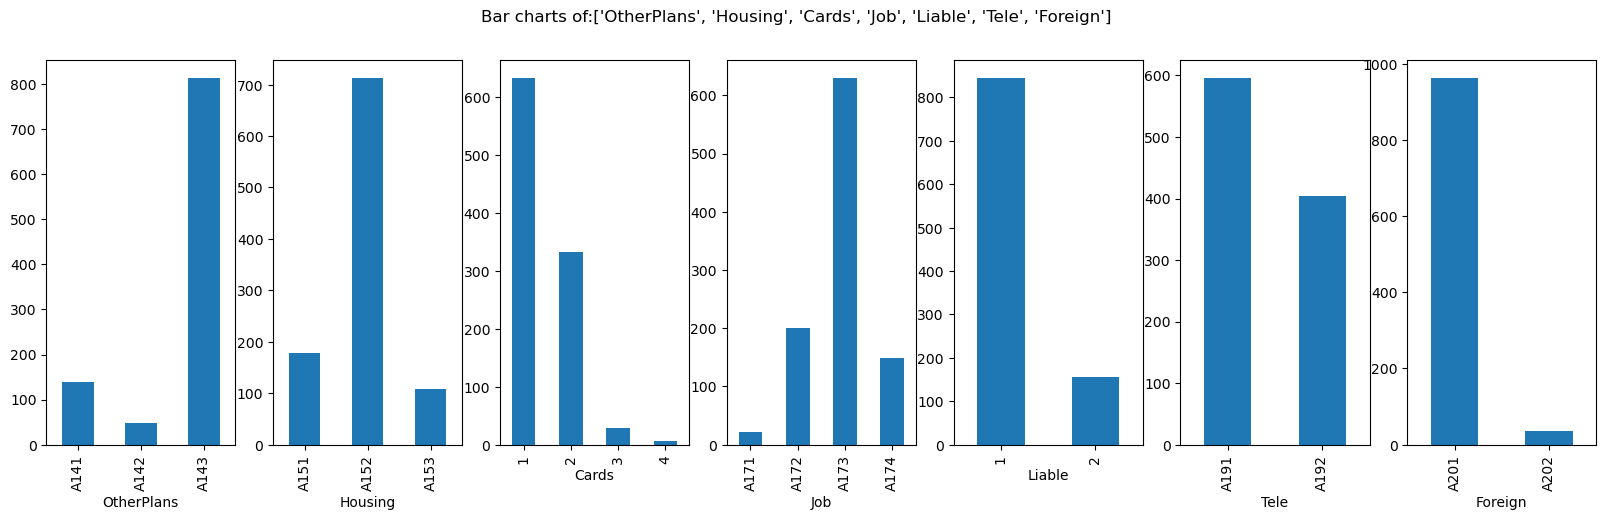

In [131]:
plotbar(inpData=CreditRiskData, colls=["OtherPlans","Housing","Cards","Job","Liable","Tele","Foreign"])

**Others** and **Foreign** have a dominant category dominating the others. So these two columns must be rejected.

array([[<Axes: title={'center': 'Duration'}>,
        <Axes: title={'center': 'Amount'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

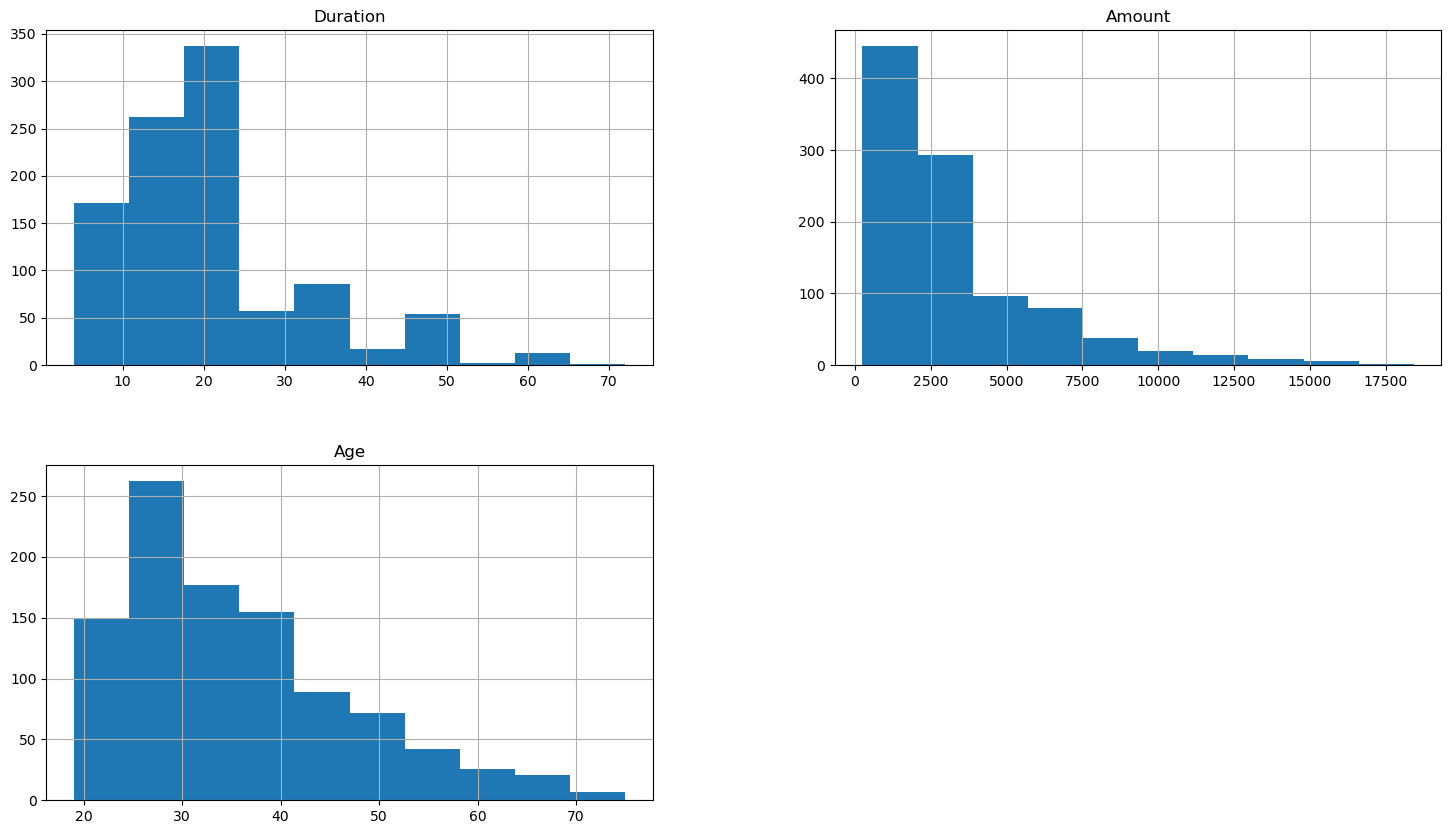

In [132]:
CreditRiskData.hist(["Duration","Amount","Age"],figsize=(18,10))

## Outlier Treatment 

In [133]:
CreditRiskData["Amount"][CreditRiskData["Amount"]<16500].sort_values(ascending=False)

95     15945
818    15857
887    15672
637    15653
917    14896
       ...  
458      343
157      339
177      338
309      276
725      250
Name: Amount, Length: 999, dtype: int64

In [134]:
CreditRiskData["Amount"][CreditRiskData["Amount"]>16500]=15945

array([[<Axes: title={'center': 'Amount'}>]], dtype=object)

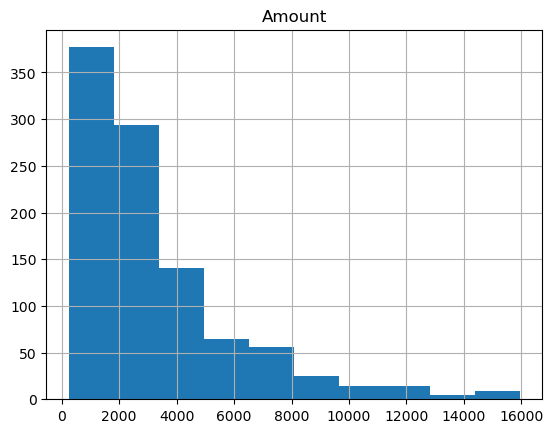

In [135]:
CreditRiskData.hist("Amount")

## Missing Value Treatment

In [136]:
CreditRiskData.isnull().sum()

GoodCredit        0
CheckingStatus    0
Duration          0
History           0
Purpose           0
Amount            0
Savings           0
Employ            0
Installment       0
Status            0
Others            0
Residence         0
Property          0
Age               0
OtherPlans        0
Housing           0
Cards             0
Job               0
Liable            0
Tele              0
Foreign           0
dtype: int64

# Visual Exploration of relationship between variables

### Categorical and Categorical Variables using Grouped Bar Charts

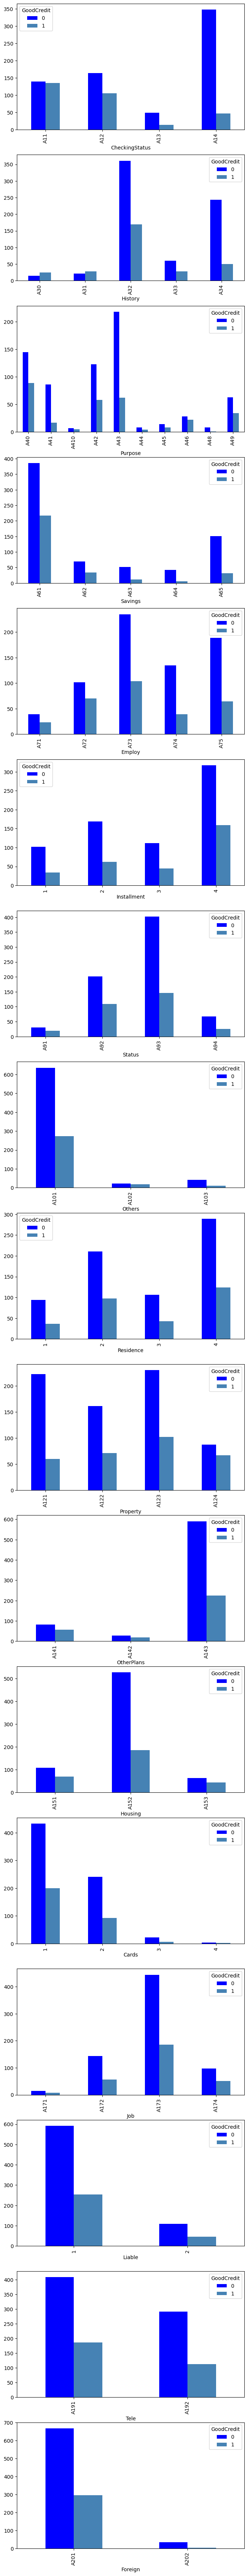

In [137]:
CategoricalColsList=['CheckingStatus', 'History', 'Purpose','Savings','Employ',
                     'Installment', 'Status', 'Others','Residence', 'Property',
                     'OtherPlans', 'Housing', 'Cards', 'Job', 'Liable', 'Tele', 'Foreign']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(8,90))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "GoodCredit"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=CreditRiskData[CategoricalCol], columns=CreditRiskData['GoodCredit'])
    CrossTabResult.plot.bar(color=['blue','steelblue'], ax=PlotCanvas[i])

In [138]:
#Chi-square test to check the result of the visual
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [139]:
CategoricalVariables=['CheckingStatus', 'History', 'Purpose','Savings','Employ',
                     'Installment', 'Status', 'Others','Residence', 'Property',
                     'OtherPlans', 'Housing', 'Cards', 'Job', 'Liable', 'Tele', 'Foreign']

# Calling the function
FunctionChisq(inpData=CreditRiskData, 
              TargetVariable='GoodCredit',
              CategoricalVariablesList= CategoricalVariables)

CheckingStatus is correlated with GoodCredit | P-Value: 1.2189020722893755e-26
History is correlated with GoodCredit | P-Value: 1.2791872956751013e-12
Purpose is correlated with GoodCredit | P-Value: 0.00011574910079691586
Savings is correlated with GoodCredit | P-Value: 2.7612142385682596e-07
Employ is correlated with GoodCredit | P-Value: 0.001045452349140254
Installment is NOT correlated with GoodCredit | P-Value: 0.1400333122128481
Status is correlated with GoodCredit | P-Value: 0.02223800546926877
Others is correlated with GoodCredit | P-Value: 0.036055954027247226
Residence is NOT correlated with GoodCredit | P-Value: 0.8615521320413175
Property is correlated with GoodCredit | P-Value: 2.8584415733250017e-05
OtherPlans is correlated with GoodCredit | P-Value: 0.0016293178186473534
Housing is correlated with GoodCredit | P-Value: 0.00011167465374597684
Cards is NOT correlated with GoodCredit | P-Value: 0.4451440800083001
Job is NOT correlated with GoodCredit | P-Value: 0.596581591

['CheckingStatus',
 'History',
 'Purpose',
 'Savings',
 'Employ',
 'Status',
 'Others',
 'Property',
 'OtherPlans',
 'Housing',
 'Foreign']

Based on the results of Chi-Square test, below are the selected predictors

'checkingstatus', 'history', 'purpose', 'savings', 'employ', 'status', 'others', 'property', 'otherplans', 'housing', 'foreign

### Continuous and Categorical Variable using Boxplots

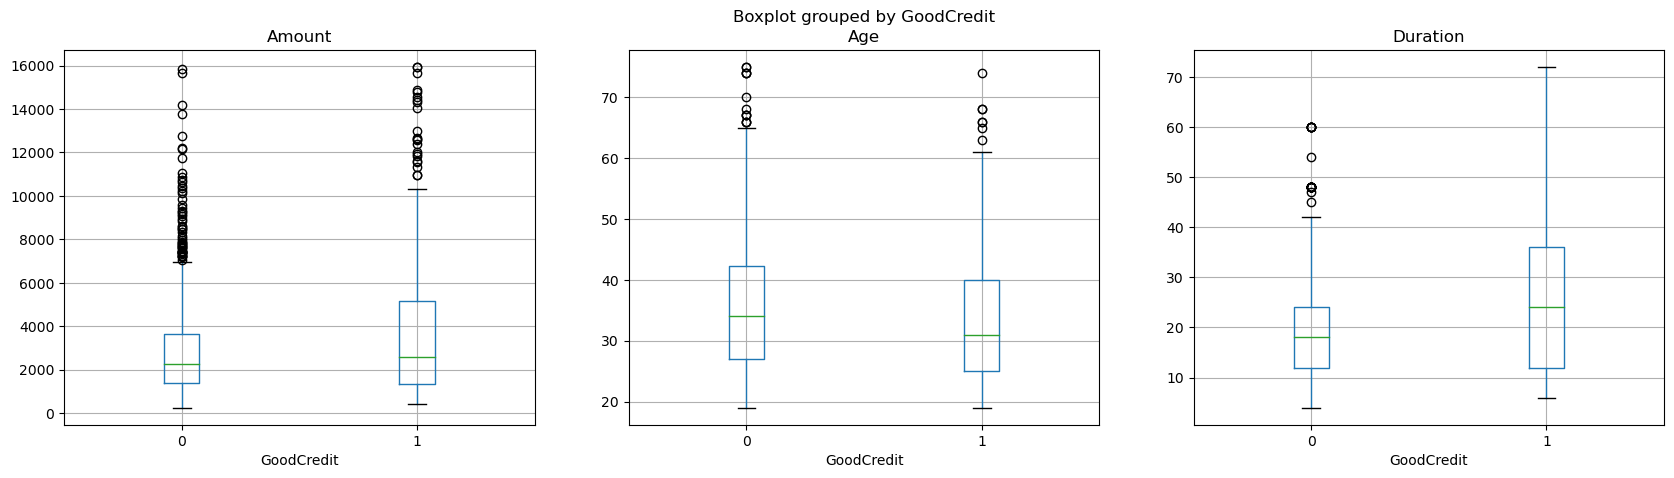

In [140]:
cols=["Amount","Age","Duration"]
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(cols), figsize=(20,5))

for Col , i in zip(cols, range(len(cols))):
    CreditRiskData.boxplot(column=Col, by='GoodCredit', figsize=(5,5), vert=True, ax=PlotCanvas[i])


In [141]:
# using ANOVA to confirm the visual analysis
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('ANOVA Results\n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [142]:
# Calling the function
ContinuousVariables=['Age', 'Amount','Duration']
FunctionAnova(inpData=CreditRiskData, TargetVariable='GoodCredit', ContinuousPredictorList=ContinuousVariables)

ANOVA Results

Age is correlated with GoodCredit | P-Value: 0.003925339398278295
Amount is correlated with GoodCredit | P-Value: 9.823517701458613e-07
Duration is correlated with GoodCredit | P-Value: 6.488049877187189e-12


['Age', 'Amount', 'Duration']

From the ANOVA Test it is clear that all the three predictors are selected which aligns with the visual

# Selcting the final predictors

In [143]:
SelectedColumns=['CheckingStatus', 'History', 'Purpose','Savings','Employ',
                      'Status', 'Others','Property','OtherPlans', 'Housing','Foreign', 'Age', 'Amount','Duration']

# Selecting final columns
DataForML=CreditRiskData[SelectedColumns]
DataForML.head()

,CheckingStatus,History,Purpose,Savings,Employ,Status,Others,Property,OtherPlans,Housing,Foreign,Age,Amount,Duration
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A201,67,1169,6
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A201,22,5951,48
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A201,49,2096,12
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A201,45,7882,42
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A201,53,4870,24


# Data Pre processing

In [144]:
# Treating the Ordinal variable first
DataForML['Employ'].replace({'A71':1, 'A72':2,'A73':3, 'A74':4,'A75':5 }, inplace=True)

In [145]:
#Converting the binary nominal variable to numeric using 1/0 mapping
DataForML['Foreign'].replace({'A201':1, 'A202':0}, inplace=True)

# Looking at data after nominal treatment
DataForML.head()

,CheckingStatus,History,Purpose,Savings,Employ,Status,Others,Property,OtherPlans,Housing,Foreign,Age,Amount,Duration
0,A11,A34,A43,A65,5,A93,A101,A121,A143,A152,1,67,1169,6
1,A12,A32,A43,A61,3,A92,A101,A121,A143,A152,1,22,5951,48
2,A14,A34,A46,A61,4,A93,A101,A121,A143,A152,1,49,2096,12
3,A11,A32,A42,A61,4,A93,A103,A122,A143,A153,1,45,7882,42
4,A11,A33,A40,A61,3,A93,A101,A124,A143,A153,1,53,4870,24


In [146]:
# Treating all the nominal variables using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML, dtype="int")

# Adding Target Variable to the data
DataForML_Numeric['GoodCredit']=CreditRiskData['GoodCredit']

# Printing sample rows
DataForML_Numeric.head()

,Employ,Foreign,Age,Amount,Duration,CheckingStatus_A11,CheckingStatus_A12,CheckingStatus_A13,CheckingStatus_A14,History_A30,...,Property_A122,Property_A123,Property_A124,OtherPlans_A141,OtherPlans_A142,OtherPlans_A143,Housing_A151,Housing_A152,Housing_A153,GoodCredit
0,5,1,67,1169,6,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,3,1,22,5951,48,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,4,1,49,2096,12,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3,4,1,45,7882,42,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,3,1,53,4870,24,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1


# Machine Learning: Splitting the data into Training and Testing sample

In [147]:
DataForML_Numeric.columns

Index(['Employ', 'Foreign', 'Age', 'Amount', 'Duration', 'CheckingStatus_A11',
       'CheckingStatus_A12', 'CheckingStatus_A13', 'CheckingStatus_A14',
       'History_A30', 'History_A31', 'History_A32', 'History_A33',
       'History_A34', 'Purpose_A40', 'Purpose_A41', 'Purpose_A410',
       'Purpose_A42', 'Purpose_A43', 'Purpose_A44', 'Purpose_A45',
       'Purpose_A46', 'Purpose_A48', 'Purpose_A49', 'Savings_A61',
       'Savings_A62', 'Savings_A63', 'Savings_A64', 'Savings_A65',
       'Status_A91', 'Status_A92', 'Status_A93', 'Status_A94', 'Others_A101',
       'Others_A102', 'Others_A103', 'Property_A121', 'Property_A122',
       'Property_A123', 'Property_A124', 'OtherPlans_A141', 'OtherPlans_A142',
       'OtherPlans_A143', 'Housing_A151', 'Housing_A152', 'Housing_A153',
       'GoodCredit'],
      dtype='object')

In [148]:
# Separate Target Variable and Predictor Variables
TargetVariable='GoodCredit'
Predictors=['Employ', 'Foreign', 'Age', 'Amount', 'Duration', 'CheckingStatus_A11',
       'CheckingStatus_A12', 'CheckingStatus_A13', 'CheckingStatus_A14',
       'History_A30', 'History_A31', 'History_A32', 'History_A33',
       'History_A34', 'Purpose_A40', 'Purpose_A41', 'Purpose_A410',
       'Purpose_A42', 'Purpose_A43', 'Purpose_A44', 'Purpose_A45',
       'Purpose_A46', 'Purpose_A48', 'Purpose_A49', 'Savings_A61',
       'Savings_A62', 'Savings_A63', 'Savings_A64', 'Savings_A65',
       'Status_A91', 'Status_A92', 'Status_A93', 'Status_A94', 'Others_A101',
       'Others_A102', 'Others_A103', 'Property_A121', 'Property_A122',
       'Property_A123', 'Property_A124', 'OtherPlans_A141', 'OtherPlans_A142',
       'OtherPlans_A143', 'Housing_A151', 'Housing_A152', 'Housing_A153']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [149]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700, 46)
(700,)
(300, 46)
(300,)


# Logistic Regression

In [150]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithmd
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       208
           1       0.69      0.45      0.54        92

    accuracy                           0.77       300
   macro avg       0.74      0.68      0.69       300
weighted avg       0.76      0.77      0.75       300

[[190  18]
 [ 51  41]]
Accuracy of the model on Testing Sample Data: 0.75

Accuracy values for 10-fold Cross Validation:
 [0.77781287 0.68       0.72238245 0.73549151 0.76028751 0.81371158
 0.63522013 0.78407524 0.78113208 0.77519841]

Final Average Accuracy of the model: 0.75
